In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Hypothesis:
#Certain types of shots in basketball are more efficient ways of scoring then others. Layups, dunks, and 
#three pointers make up the shots which I expect to yield the most points. By building out profiles of shot distribution 
#and expected points using Play-by-Play data, I hope to gain insight into this matter and how NBA teams could change their
#tendencies to be more efficient scoring the ball.

In [3]:
#Problem statement:
#The first objective of this project is to gain insight into the most efficient types of shots in basketball. The second 
#goal is to build a profile of the shots (whether it be the shot distance, shot type, etc.) that teams in the NBA
#take. This is first and foremost a data cleaning project, and the majority of the work will be done preparing the data 
#to answer these questions; with a secondary focus on exploring the questions themselves. The data being used is five 
#similarly formatted csv files (each containing Play-by-Play data for a different NBA season), which I'll build a data 
#pipeline for, then combine to perform further analysis on. 

In [4]:
Df=pd.read_csv("2000-01_pbp.csv")

In [5]:
#Examine the data
Df.head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,0,20001116,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:11 PM
1,1,0,10,1,20001116,Jump Ball Grant vs. Mutombo: Tip to Hill,NaN,12:00,1,4.0,...,238,Tyrone Hill,PHI,Philadelphia,1.610613e+09,76ers,NaN,NaN,NaN,12:12 PM
2,2,1,1,2,20001116,NaN,NaN,11:45,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Iverson 21' Jump Shot (2 PTS),12:13 PM
3,3,1,6,3,20001116,NaN,NaN,11:28,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hill P.FOUL (P1.T1),12:13 PM
4,4,1,1,4,20001116,Mason 17' Jump Shot (2 PTS),NaN,11:19,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 2,TIE,NaN,12:13 PM


In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537157 entries, 0 to 537156
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 537157 non-null  int64  
 1   EVENTMSGACTIONTYPE         537157 non-null  int64  
 2   EVENTMSGTYPE               537157 non-null  int64  
 3   EVENTNUM                   537157 non-null  int64  
 4   GAME_ID                    537157 non-null  int64  
 5   HOMEDESCRIPTION            280199 non-null  object 
 6   NEUTRALDESCRIPTION         0 non-null       float64
 7   PCTIMESTRING               537157 non-null  object 
 8   PERIOD                     537157 non-null  int64  
 9   PERSON1TYPE                537156 non-null  float64
 10  PERSON2TYPE                537157 non-null  int64  
 11  PERSON3TYPE                537157 non-null  int64  
 12  PLAYER1_ID                 537157 non-null  int64  
 13  PLAYER1_NAME               48

In [7]:
#pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [8]:
#Necessary data cleaning steps: drop unnecessary columns and filter records as needed, rename columns for readability,
#engineer columns to contribute to later analysis, define data pipeline, combine csv files into a master data frame 
#leveraging data pipeline. 

In [9]:
#Remove "Unnamed: 0" column noted above.
Df=Df.iloc[:,1:34]

In [10]:
#Remove all columns that don't relate to the analysis here.
Df=Df.drop(columns=['NEUTRALDESCRIPTION', 'PLAYER1_TEAM_NICKNAME','PLAYER1_TEAM_CITY',
'PLAYER2_ID','PLAYER2_NAME','PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY','PLAYER2_TEAM_ID','PLAYER2_TEAM_NICKNAME',
'PLAYER3_ID','PLAYER3_NAME','PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY','PLAYER3_TEAM_ID','PLAYER3_TEAM_NICKNAME',                                        
                                         'WCTIMESTRING','PERSON1TYPE','PERSON2TYPE','PERSON3TYPE','EVENTNUM','GAME_ID'])
Df

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,HOMEDESCRIPTION,PCTIMESTRING,PERIOD,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_ID,SCORE,SCOREMARGIN,VISITORDESCRIPTION
0,0,12,NaN,12:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,10,Jump Ball Grant vs. Mutombo: Tip to Hill,12:00,1,258,Brian Grant,MIA,1.610613e+09,NaN,NaN,NaN
2,1,1,NaN,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Iverson 21' Jump Shot (2 PTS)
3,1,6,NaN,11:28,1,238,Tyrone Hill,PHI,1.610613e+09,NaN,NaN,Hill P.FOUL (P1.T1)
4,1,1,Mason 17' Jump Shot (2 PTS),11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537152,4,1,Allen Tip Shot (30 PTS),0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,NaN
537153,1,5,Robinson STEAL (2 STL),0:16,4,133,David Wesley,CHH,1.610613e+09,NaN,NaN,Wesley Bad Pass Turnover (P2.T16)
537154,1,2,MISS Thomas 27' 3PT Jump Shot,0:07,4,1501,Tim Thomas,MIL,1.610613e+09,NaN,NaN,NaN
537155,0,4,NaN,0:04,4,922,Elden Campbell,CHH,1.610613e+09,NaN,NaN,Campbell REBOUND (Off:4 Def:6)


In [11]:
#Engineer home vs away column
Df['HOME_OR_AWAY'] = np.where(Df['HOMEDESCRIPTION'].isnull(), 'Away', 'Home')
Df

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,HOMEDESCRIPTION,PCTIMESTRING,PERIOD,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_ID,SCORE,SCOREMARGIN,VISITORDESCRIPTION,HOME_OR_AWAY
0,0,12,NaN,12:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,Away
1,0,10,Jump Ball Grant vs. Mutombo: Tip to Hill,12:00,1,258,Brian Grant,MIA,1.610613e+09,NaN,NaN,NaN,Home
2,1,1,NaN,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Iverson 21' Jump Shot (2 PTS),Away
3,1,6,NaN,11:28,1,238,Tyrone Hill,PHI,1.610613e+09,NaN,NaN,Hill P.FOUL (P1.T1),Away
4,1,1,Mason 17' Jump Shot (2 PTS),11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,NaN,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537152,4,1,Allen Tip Shot (30 PTS),0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,NaN,Home
537153,1,5,Robinson STEAL (2 STL),0:16,4,133,David Wesley,CHH,1.610613e+09,NaN,NaN,Wesley Bad Pass Turnover (P2.T16),Home
537154,1,2,MISS Thomas 27' 3PT Jump Shot,0:07,4,1501,Tim Thomas,MIL,1.610613e+09,NaN,NaN,NaN,Home
537155,0,4,NaN,0:04,4,922,Elden Campbell,CHH,1.610613e+09,NaN,NaN,Campbell REBOUND (Off:4 Def:6),Away


In [12]:
#Combine description columns
Df['DESCRIPTION'] = np.where(Df['HOMEDESCRIPTION'].isnull(), Df['VISITORDESCRIPTION'], 
                                        Df['HOMEDESCRIPTION'])
Df

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,HOMEDESCRIPTION,PCTIMESTRING,PERIOD,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_ID,SCORE,SCOREMARGIN,VISITORDESCRIPTION,HOME_OR_AWAY,DESCRIPTION
0,0,12,NaN,12:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN
1,0,10,Jump Ball Grant vs. Mutombo: Tip to Hill,12:00,1,258,Brian Grant,MIA,1.610613e+09,NaN,NaN,NaN,Home,Jump Ball Grant vs. Mutombo: Tip to Hill
2,1,1,NaN,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Iverson 21' Jump Shot (2 PTS),Away,Iverson 21' Jump Shot (2 PTS)
3,1,6,NaN,11:28,1,238,Tyrone Hill,PHI,1.610613e+09,NaN,NaN,Hill P.FOUL (P1.T1),Away,Hill P.FOUL (P1.T1)
4,1,1,Mason 17' Jump Shot (2 PTS),11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,NaN,Home,Mason 17' Jump Shot (2 PTS)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537152,4,1,Allen Tip Shot (30 PTS),0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,NaN,Home,Allen Tip Shot (30 PTS)
537153,1,5,Robinson STEAL (2 STL),0:16,4,133,David Wesley,CHH,1.610613e+09,NaN,NaN,Wesley Bad Pass Turnover (P2.T16),Home,Robinson STEAL (2 STL)
537154,1,2,MISS Thomas 27' 3PT Jump Shot,0:07,4,1501,Tim Thomas,MIL,1.610613e+09,NaN,NaN,NaN,Home,MISS Thomas 27' 3PT Jump Shot
537155,0,4,NaN,0:04,4,922,Elden Campbell,CHH,1.610613e+09,NaN,NaN,Campbell REBOUND (Off:4 Def:6),Away,Campbell REBOUND (Off:4 Def:6)


In [13]:
#Remove these columns now that we've created the composite DESCRIPTION column.
Df=Df.drop(columns=['HOMEDESCRIPTION','VISITORDESCRIPTION'])

In [14]:
#The next step in preparing for the analysis is to figure out what the different values for EVENTMSGACTIONTYPE and 
#EVENTMSGTYPE mean. I figure that these values could be used to help identify different types of shots and possessions 
#(which would be very valuable in the analysis to come), but without domain knowledge these values aren't decipherable.
Eventtypedf=Df[['EVENTMSGACTIONTYPE','EVENTMSGTYPE','DESCRIPTION']]
Eventtypedf

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,DESCRIPTION
0,0,12,NaN
1,0,10,Jump Ball Grant vs. Mutombo: Tip to Hill
2,1,1,Iverson 21' Jump Shot (2 PTS)
3,1,6,Hill P.FOUL (P1.T1)
4,1,1,Mason 17' Jump Shot (2 PTS)
...,...,...,...
537152,4,1,Allen Tip Shot (30 PTS)
537153,1,5,Robinson STEAL (2 STL)
537154,1,2,MISS Thomas 27' 3PT Jump Shot
537155,0,4,Campbell REBOUND (Off:4 Def:6)


In [15]:
Eventtypedf.sort_values(by=['EVENTMSGACTIONTYPE', 'EVENTMSGTYPE'])

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,DESCRIPTION
208194,0,1,Anderson No Shot (11 PTS)
95995,0,2,MISS Carter No Shot
208237,0,2,Francis BLOCK (1 BLK)
6,0,4,Mason REBOUND (Off:0 Def:1)
8,0,4,Snow REBOUND (Off:0 Def:1)
...,...,...,...
269609,62,1,Hill Turnaround Finger Roll (4 PTS) (Iverson ...
360720,62,1,Jamison 5' Turnaround Finger Roll (26 PTS) (Bl...
372363,62,1,Williamson Turnaround Finger Roll (4 PTS)
389559,62,1,Moore Turnaround Finger Roll (6 PTS) (Barros ...


In [16]:
#Note that in order to reduce the size of this notebook I've commented out the statement above that allows 1000 rows to be 
#displayed. Panning through the 1000 rows in Df and referencing the previous cell is how I reached the conclusions below:

#This quick overview lets one deduce that EVENTMSGACTIONTYPE=1, EVENTMSGTYPE=1 corresponds to a made jump shot, 
#EVENTMSGACTIONTYPE=1, EVENTMSGTYPE=2 corresponds to a missed (or blocked) jump shot, 
#EVENTMSGACTIONTYPE=3, EVENTMSGTYPE=1 corresponds to a made hook shot whereas 3,2 is a missed hook shot.
#Every value of EVENTMSGACTIONTYPE corresponds to a different type of shot.
#A value of 1 for EVENTMSGTYPE corresponds to a make and 2 is a miss (greater values denote turnovers and such).
#Note that wording of the shot is important, dunk isn't assigned the same EVENTMSGACTIONTYPE as slam dunk.

In [17]:
#Filter down to the shots, using the information in the cell above.
Df=Df[Df['EVENTMSGTYPE'].isin([1,2])]
Df

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,PCTIMESTRING,PERIOD,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION
2,1,1,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Away,Iverson 21' Jump Shot (2 PTS)
4,1,1,11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,Home,Mason 17' Jump Shot (2 PTS)
5,1,2,10:56,1,248,George Lynch,PHI,1.610613e+09,NaN,NaN,Away,MISS Lynch 22' Jump Shot
7,42,2,10:49,1,105,Dan Majerle,MIA,1.610613e+09,NaN,NaN,Home,MISS Majerle Driving Layup
9,5,1,10:44,1,248,George Lynch,PHI,1.610613e+09,4 - 2,-2,Away,Lynch Layup (2 PTS) (Snow 1 AST)
...,...,...,...,...,...,...,...,...,...,...,...,...
537147,5,1,0:52,4,1884,Baron Davis,CHH,1.610613e+09,103 - 89,-14,Away,Davis Layup (21 PTS)
537148,5,1,0:44,4,951,Ray Allen,MIL,1.610613e+09,103 - 91,-12,Home,Allen Layup (28 PTS)
537150,40,2,0:32,4,299,Glenn Robinson,MIL,1.610613e+09,NaN,NaN,Home,MISS Robinson Layup
537152,4,1,0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,Home,Allen Tip Shot (30 PTS)


In [18]:
#Note that all entries in the above Df seem to be shots, except some blocks which lack any description of shot type:
Df[Df['DESCRIPTION'].str.contains('BLOCK')]

,EVENTMSGACTIONTYPE,EVENTMSGTYPE,PCTIMESTRING,PERIOD,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ABBREVIATION,PLAYER1_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION
70,1,2,1:07,1,947,Allen Iverson,PHI,1.610613e+09,NaN,NaN,Home,Bowen BLOCK (1 BLK)
96,42,2,10:18,2,243,Aaron McKie,PHI,1.610613e+09,NaN,NaN,Home,Mourning BLOCK (1 BLK)
225,5,2,7:34,3,238,Tyrone Hill,PHI,1.610613e+09,NaN,NaN,Home,Majerle BLOCK (1 BLK)
406,1,2,1:25,4,947,Allen Iverson,PHI,1.610613e+09,NaN,NaN,Home,Mourning BLOCK (2 BLK)
432,1,2,11:28,1,970,Othella Harrington,VAN,1.610613e+09,NaN,NaN,Home,Patterson BLOCK (1 BLK)
...,...,...,...,...,...,...,...,...,...,...,...,...
536444,5,2,10:02,2,922,Elden Campbell,CHH,1.610613e+09,NaN,NaN,Home,Brand BLOCK (1 BLK)
536573,5,2,7:34,3,1884,Baron Davis,CHH,1.610613e+09,NaN,NaN,Home,World Peace BLOCK (1 BLK)
536742,1,2,0:40,4,922,Elden Campbell,CHH,1.610613e+09,NaN,NaN,Home,Brand BLOCK (2 BLK)
536989,5,2,7:46,3,469,Jamal Mashburn,CHH,1.610613e+09,NaN,NaN,Home,Przybilla BLOCK (1 BLK)


In [19]:
#These block entries need to be filtered out for the sake of the analysis: due to the fact that their descriptions 
#don't contain any information about the shot distance. 
#Since these rows are being excluded from the analysis, I'll make sure to note that in the findings.
Df=Df[~Df['DESCRIPTION'].str.contains('BLOCK')]

In [20]:
#Now that the data is just shots, rename the columns for readability.
Df=Df.rename(columns={'PCTIMESTRING':'TIME_REMAINING','PLAYER1_ID':'SHOOTER_ID','PLAYER1_NAME':'SHOOTER_NAME',
'PLAYER1_TEAM_ABBREVIATION':'SHOOTER_TEAM_ABBREVIATION','PLAYER1_TEAM_ID':'SHOOTER_TEAM_ID',
                                            'EVENTMSGACTIONTYPE':'SHOT_TYPE','EVENTMSGTYPE':'MAKE_OR_MISS'})

In [21]:
#Change the values of "MAKE_OR_MISS" to something more easily understandable.
Df['MAKE_OR_MISS']=np.where(Df['MAKE_OR_MISS']==1,'Make', 'Miss')

In [22]:
#Engineer a shot distance field. For this column, set the value for layups and dunks without a shot distance in
#the description to 0'; as these types of shots occur at the rim. Special logic had to be added to check the number of 
#commas in the DESCRIPTION string, as names like O'neal were messing up the initial approach. 
def ShotDistance(df):
    if (df['DESCRIPTION'].count("'") == 1 and df['SHOOTER_NAME'].count("'") == 1):
        return "0"
    elif (df['DESCRIPTION'].count("'") == 1 and df['SHOOTER_NAME'].count("'") == 0):
        return df['DESCRIPTION'].split("'")[0]
    elif (df['DESCRIPTION'].count("'")== 2):
        return df['DESCRIPTION'].split("'")[1]
    else:
        return "0"
    
Df['SHOT_DISTANCE'] = Df.apply(ShotDistance, axis = 1)
Df['SHOT_DISTANCE']=Df['SHOT_DISTANCE'].str.extract('(\d+)').astype(int)
Df

,SHOT_TYPE,MAKE_OR_MISS,TIME_REMAINING,PERIOD,SHOOTER_ID,SHOOTER_NAME,SHOOTER_TEAM_ABBREVIATION,SHOOTER_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION,SHOT_DISTANCE
2,1,Make,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Away,Iverson 21' Jump Shot (2 PTS),21
4,1,Make,11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,Home,Mason 17' Jump Shot (2 PTS),17
5,1,Miss,10:56,1,248,George Lynch,PHI,1.610613e+09,NaN,NaN,Away,MISS Lynch 22' Jump Shot,22
7,42,Miss,10:49,1,105,Dan Majerle,MIA,1.610613e+09,NaN,NaN,Home,MISS Majerle Driving Layup,0
9,5,Make,10:44,1,248,George Lynch,PHI,1.610613e+09,4 - 2,-2,Away,Lynch Layup (2 PTS) (Snow 1 AST),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537147,5,Make,0:52,4,1884,Baron Davis,CHH,1.610613e+09,103 - 89,-14,Away,Davis Layup (21 PTS),0
537148,5,Make,0:44,4,951,Ray Allen,MIL,1.610613e+09,103 - 91,-12,Home,Allen Layup (28 PTS),0
537150,40,Miss,0:32,4,299,Glenn Robinson,MIL,1.610613e+09,NaN,NaN,Home,MISS Robinson Layup,0
537152,4,Make,0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,Home,Allen Tip Shot (30 PTS),0


In [23]:
#Add a boolean 3-pointer column.
Df['THREE_POINTER']=np.where(Df['DESCRIPTION'].str.contains("3PT"), 
                                        "Yes", "No")
Df

,SHOT_TYPE,MAKE_OR_MISS,TIME_REMAINING,PERIOD,SHOOTER_ID,SHOOTER_NAME,SHOOTER_TEAM_ABBREVIATION,SHOOTER_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION,SHOT_DISTANCE,THREE_POINTER
2,1,Make,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Away,Iverson 21' Jump Shot (2 PTS),21,No
4,1,Make,11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,Home,Mason 17' Jump Shot (2 PTS),17,No
5,1,Miss,10:56,1,248,George Lynch,PHI,1.610613e+09,NaN,NaN,Away,MISS Lynch 22' Jump Shot,22,No
7,42,Miss,10:49,1,105,Dan Majerle,MIA,1.610613e+09,NaN,NaN,Home,MISS Majerle Driving Layup,0,No
9,5,Make,10:44,1,248,George Lynch,PHI,1.610613e+09,4 - 2,-2,Away,Lynch Layup (2 PTS) (Snow 1 AST),0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537147,5,Make,0:52,4,1884,Baron Davis,CHH,1.610613e+09,103 - 89,-14,Away,Davis Layup (21 PTS),0,No
537148,5,Make,0:44,4,951,Ray Allen,MIL,1.610613e+09,103 - 91,-12,Home,Allen Layup (28 PTS),0,No
537150,40,Miss,0:32,4,299,Glenn Robinson,MIL,1.610613e+09,NaN,NaN,Home,MISS Robinson Layup,0,No
537152,4,Make,0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,Home,Allen Tip Shot (30 PTS),0,No


In [24]:
#Add a points yielded column. This will prove useful to calculate expected points when grouping by other variables.  
def points_df(df):
    
    if (df['MAKE_OR_MISS']=='Make' and df['THREE_POINTER']=='Yes'):
        return 3
    elif (df['MAKE_OR_MISS']=='Make' and df['THREE_POINTER']=='No'):
        return 2
    else:
        return 0
    
Df['POINTS'] = Df.apply(points_df, axis = 1)
Df

,SHOT_TYPE,MAKE_OR_MISS,TIME_REMAINING,PERIOD,SHOOTER_ID,SHOOTER_NAME,SHOOTER_TEAM_ABBREVIATION,SHOOTER_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION,SHOT_DISTANCE,THREE_POINTER,POINTS
2,1,Make,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Away,Iverson 21' Jump Shot (2 PTS),21,No,2
4,1,Make,11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,Home,Mason 17' Jump Shot (2 PTS),17,No,2
5,1,Miss,10:56,1,248,George Lynch,PHI,1.610613e+09,NaN,NaN,Away,MISS Lynch 22' Jump Shot,22,No,0
7,42,Miss,10:49,1,105,Dan Majerle,MIA,1.610613e+09,NaN,NaN,Home,MISS Majerle Driving Layup,0,No,0
9,5,Make,10:44,1,248,George Lynch,PHI,1.610613e+09,4 - 2,-2,Away,Lynch Layup (2 PTS) (Snow 1 AST),0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537147,5,Make,0:52,4,1884,Baron Davis,CHH,1.610613e+09,103 - 89,-14,Away,Davis Layup (21 PTS),0,No,2
537148,5,Make,0:44,4,951,Ray Allen,MIL,1.610613e+09,103 - 91,-12,Home,Allen Layup (28 PTS),0,No,2
537150,40,Miss,0:32,4,299,Glenn Robinson,MIL,1.610613e+09,NaN,NaN,Home,MISS Robinson Layup,0,No,0
537152,4,Make,0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,Home,Allen Tip Shot (30 PTS),0,No,2


In [25]:
#Now make the 'SHOT_TYPE' column more easily interpretable by figuring out what type of shot each number corresponds to. 
ShotTypeDf=Df[{'SHOT_TYPE',"DESCRIPTION", "SHOT_DISTANCE"}]
ShotTypeDf.groupby('SHOT_TYPE').first()

,DESCRIPTION,SHOT_DISTANCE
SHOT_TYPE,,
0,MISS Carter No Shot,0
1,Iverson 21' Jump Shot (2 PTS),21
2,MISS Duncan 7' Running Jump Shot,7
3,MISS Mason 5' Hook Shot,5
4,Jones Tip Shot (2 PTS),0
5,Lynch Layup (2 PTS) (Snow 1 AST),0
7,Mourning Dunk (2 PTS) (Majerle 4 AST),0
8,Mourning Slam Dunk (10 PTS),0
40,MISS Bowen Layup,0


In [26]:
#Upon further inspection, it's clear that the different values can be grouped into more succinct shot types. This will 
#contribute to the later analysis as it gives a more concise way of categorizing shots: where a shot described as a 
#"dunk" will be in the same category as a "slam dunk."
def NewShotType(type):
    if type in [1,2,45,46,47]:
        return "Jump Shot"
    elif type in [3,55,56,57,58]:
        return "Hook Shot"
    elif type in [5,40,41,42,43,44,59,60,61,62]:
        return "Layup"
    elif type in [7,8,48,49,50,51,52]:
        return "Dunk"
    elif type in [4,53,54]:
        return "Tip Shot"
    else:
        return "Error"
Df=Df[~(Df["SHOT_TYPE"]==0)]
Df["SHOT_TYPE"]=Df["SHOT_TYPE"].apply(NewShotType)
Df

C:\Users\husto\AppData\Local\Temp/ipykernel_22880/2367384327.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df["SHOT_TYPE"]=Df["SHOT_TYPE"].apply(NewShotType)


,SHOT_TYPE,MAKE_OR_MISS,TIME_REMAINING,PERIOD,SHOOTER_ID,SHOOTER_NAME,SHOOTER_TEAM_ABBREVIATION,SHOOTER_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION,SHOT_DISTANCE,THREE_POINTER,POINTS
2,Jump Shot,Make,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Away,Iverson 21' Jump Shot (2 PTS),21,No,2
4,Jump Shot,Make,11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,Home,Mason 17' Jump Shot (2 PTS),17,No,2
5,Jump Shot,Miss,10:56,1,248,George Lynch,PHI,1.610613e+09,NaN,NaN,Away,MISS Lynch 22' Jump Shot,22,No,0
7,Layup,Miss,10:49,1,105,Dan Majerle,MIA,1.610613e+09,NaN,NaN,Home,MISS Majerle Driving Layup,0,No,0
9,Layup,Make,10:44,1,248,George Lynch,PHI,1.610613e+09,4 - 2,-2,Away,Lynch Layup (2 PTS) (Snow 1 AST),0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537147,Layup,Make,0:52,4,1884,Baron Davis,CHH,1.610613e+09,103 - 89,-14,Away,Davis Layup (21 PTS),0,No,2
537148,Layup,Make,0:44,4,951,Ray Allen,MIL,1.610613e+09,103 - 91,-12,Home,Allen Layup (28 PTS),0,No,2
537150,Layup,Miss,0:32,4,299,Glenn Robinson,MIL,1.610613e+09,NaN,NaN,Home,MISS Robinson Layup,0,No,0
537152,Tip Shot,Make,0:32,4,951,Ray Allen,MIL,1.610613e+09,103 - 93,-10,Home,Allen Tip Shot (30 PTS),0,No,2


In [27]:
#Define the data pipeline here based on the previous steps. 
def DataPipeline(csvname):
    df=pd.read_csv(csvname)
    df=df.iloc[:,1:34]
    df=df.drop(columns=['NEUTRALDESCRIPTION', 'PLAYER1_TEAM_NICKNAME','PLAYER1_TEAM_CITY',
'PLAYER2_ID','PLAYER2_NAME','PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY','PLAYER2_TEAM_ID','PLAYER2_TEAM_NICKNAME',
'PLAYER3_ID','PLAYER3_NAME','PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY','PLAYER3_TEAM_ID','PLAYER3_TEAM_NICKNAME',                                        
                                         'WCTIMESTRING','PERSON1TYPE','PERSON2TYPE','PERSON3TYPE','EVENTNUM','GAME_ID'])
    df['HOME_OR_AWAY'] = np.where(df['HOMEDESCRIPTION'].isnull(), 'Away', 'Home')
    df['DESCRIPTION'] = np.where(df['HOMEDESCRIPTION'].isnull(), df['VISITORDESCRIPTION'], df['HOMEDESCRIPTION'])
    df=df.drop(columns=['HOMEDESCRIPTION','VISITORDESCRIPTION'])
    df=df[df['EVENTMSGTYPE'].isin([1,2])]
    df=df[~df['DESCRIPTION'].str.contains('BLOCK')]
    df=df.rename(columns={'PCTIMESTRING':'TIME_REMAINING','PLAYER1_ID':'SHOOTER_ID','PLAYER1_NAME':'SHOOTER_NAME',
'PLAYER1_TEAM_ABBREVIATION':'SHOOTER_TEAM_ABBREVIATION','PLAYER1_TEAM_ID':'SHOOTER_TEAM_ID',
                                            'EVENTMSGACTIONTYPE':'SHOT_TYPE','EVENTMSGTYPE':'MAKE_OR_MISS'})
    df['MAKE_OR_MISS']=np.where(df['MAKE_OR_MISS']==1,'Make', 'Miss')
    df['SHOT_DISTANCE'] = df.apply(ShotDistance, axis = 1)
    df['SHOT_DISTANCE']=df['SHOT_DISTANCE'].str.extract('(\d+)').astype(int)
    df['THREE_POINTER']=np.where(df['DESCRIPTION'].str.contains("3PT"), "Yes", "No")
    df['POINTS'] = df.apply(points_df, axis = 1)
    df=df[~(df["SHOT_TYPE"]==0)]
    df["SHOT_TYPE2"]=df["SHOT_TYPE"].apply(NewShotType)
    return df

In [28]:
#Now amas all the data for 2000 through 2004 seasons in one dataset to perform analysis on.
Data2000=DataPipeline("2000-01_pbp.csv")
Data2001=DataPipeline("2001-02_pbp.csv")
Data2002=DataPipeline("2002-03_pbp.csv")
Data2003=DataPipeline("2003-04_pbp.csv")
Data2004=DataPipeline("2004-05_pbp.csv")
ValidationDf=pd.concat([Data2000, Data2001, Data2002, Data2003, Data2004], ignore_index=True)

In [29]:
ValidationDf

,SHOT_TYPE,MAKE_OR_MISS,TIME_REMAINING,PERIOD,SHOOTER_ID,SHOOTER_NAME,SHOOTER_TEAM_ABBREVIATION,SHOOTER_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION,SHOT_DISTANCE,THREE_POINTER,POINTS,SHOT_TYPE2
0,1,Make,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Away,Iverson 21' Jump Shot (2 PTS),21,No,2,Jump Shot
1,1,Make,11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,Home,Mason 17' Jump Shot (2 PTS),17,No,2,Jump Shot
2,1,Miss,10:56,1,248,George Lynch,PHI,1.610613e+09,NaN,NaN,Away,MISS Lynch 22' Jump Shot,22,No,0,Jump Shot
3,42,Miss,10:49,1,105,Dan Majerle,MIA,1.610613e+09,NaN,NaN,Home,MISS Majerle Driving Layup,0,No,0,Layup
4,5,Make,10:44,1,248,George Lynch,PHI,1.610613e+09,4 - 2,-2,Away,Lynch Layup (2 PTS) (Snow 1 AST),0,No,2,Layup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931879,1,Miss,1:01,4,2202,Jason Richardson,GSW,1.610613e+09,NaN,NaN,Away,MISS Richardson 17' Jump Shot,17,No,0,Jump Shot
931880,1,Make,0:44,4,739,Rasheed Wallace,DET,1.610613e+09,88 - 90,2,Home,Wallace 17' Jump Shot (13 PTS) (Hamilton 7 AST),17,No,2,Jump Shot
931881,56,Make,0:18,4,2419,Tayshaun Prince,DET,1.610613e+09,88 - 92,4,Home,Prince 9' Running Hook Shot (20 PTS),9,No,2,Hook Shot
931882,1,Miss,0:12,4,2202,Jason Richardson,GSW,1.610613e+09,NaN,NaN,Away,MISS Richardson 24' 3PT Jump Shot,24,Yes,0,Jump Shot


In [30]:
#Now that the data has been amassed, perform a data quality check to make sure it's ready for analysis. 

In [31]:
#It appears that all columns have been assigned the proper type. 
ValidationDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931884 entries, 0 to 931883
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SHOT_TYPE                  931884 non-null  int64  
 1   MAKE_OR_MISS               931884 non-null  object 
 2   TIME_REMAINING             931884 non-null  object 
 3   PERIOD                     931884 non-null  int64  
 4   SHOOTER_ID                 931884 non-null  int64  
 5   SHOOTER_NAME               931884 non-null  object 
 6   SHOOTER_TEAM_ABBREVIATION  931884 non-null  object 
 7   SHOOTER_TEAM_ID            931884 non-null  float64
 8   SCORE                      427502 non-null  object 
 9   SCOREMARGIN                427502 non-null  object 
 10  HOME_OR_AWAY               931884 non-null  object 
 11  DESCRIPTION                931884 non-null  object 
 12  SHOT_DISTANCE              931884 non-null  int32  
 13  THREE_POINTER              93

In [32]:
#It's easily inferred from the cell above that no columns have unexpetced null values. SCORE and SCOREMARGIN should have 
#null values, as the score didn't change as a result of missed shots. 

In [33]:
#Now verify that SHOT_DISTANCE and SHOT_TYPE fit within the constraints. These columns are important to check,
#as analysis will be performed on them and they were created with relatively complex logic. 

In [34]:
ValidationDf["SHOT_DISTANCE"].unique()

array([  21,   17,   22,    0,   14,    4,    7,   24,   20,   15,    5,
         19,   16,   13,   12,   18,    6,   25,    8,   10,    9,    2,
          3,   26,    1,   11,   27,   23,   41,   40,   44,   30,   28,
         70,   34,   42,   60,   36,   29,   56,   31,   35,   46,   38,
         64,   55,   66,   33,   39,   43,   45,   58,   67,   32,   47,
         57,   48,   62,   63,   52,   65,   50,   71,   80,   77,   53,
         81,   37,   72,   54,   49,   61,   51,   69,   79,   74,   76,
         85,   84,   86,   73,   59,   78,   68,   87,   82,   83,   75,
         89,  410, 1640,   88,   90])

In [35]:
#Filter out erroneous values. It's likely that the two large shot distances were entered incorrectly by a statistician: as
#an NBA court is only 94 feet long. 
ValidationDf=ValidationDf[ValidationDf['SHOT_DISTANCE']<95]

In [36]:
#See below that some records are being assigned error for SHOT_TYPE.
ValidationDf["SHOT_TYPE2"].unique()

array(['Jump Shot', 'Layup', 'Hook Shot', 'Tip Shot', 'Dunk', 'Error'],
      dtype=object)

In [37]:
ValidationDf[ValidationDf["SHOT_TYPE2"]=="Error"]["SHOT_TYPE"].unique()

array([65, 63, 64, 66, 67], dtype=int64)

In [38]:
#These five additional values need to be added to the NewShotType function.
ShotTypeDf=ValidationDf[ValidationDf["SHOT_TYPE2"]=="Error"][{'SHOT_TYPE',"DESCRIPTION", "SHOT_DISTANCE"}]
ShotTypeDf.groupby('SHOT_TYPE').first()

,DESCRIPTION,SHOT_DISTANCE
SHOT_TYPE,,
63,Coleman 13' Fadeaway Jumper (6 PTS),13
64,Olowokandi Follow Up Dunk (14 PTS),0
65,Thomas 3' Jump Hook Shot (12 PTS) (Rice 1 AST),3
66,MISS Davis 13' Jump Bank Shot,13
67,Wilcox 8' Hook Bank Shot (2 PTS) (Jaric 1 AST),8


In [39]:
#Redefine the function with additional conditions. 
def NewShotType(type):
    if type in [1,2,45,46,47,63,66]:
        return "Jump Shot"
    elif type in [3,55,56,57,58,65,67]:
        return "Hook Shot"
    elif type in [5,40,41,42,43,44,59,60,61,62]:
        return "Layup"
    elif type in [7,8,48,49,50,51,52,64]:
        return "Dunk"
    elif type in [4,53,54]:
        return "Tip Shot"
    else:
        return "Error"

In [40]:
def DataPipeline(csvname):
    df=pd.read_csv(csvname)
    df=df.iloc[:,1:34]
    df=df.drop(columns=['NEUTRALDESCRIPTION', 'PLAYER1_TEAM_NICKNAME','PLAYER1_TEAM_CITY',
'PLAYER2_ID','PLAYER2_NAME','PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY','PLAYER2_TEAM_ID','PLAYER2_TEAM_NICKNAME',
'PLAYER3_ID','PLAYER3_NAME','PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY','PLAYER3_TEAM_ID','PLAYER3_TEAM_NICKNAME',                                        
                                         'WCTIMESTRING','PERSON1TYPE','PERSON2TYPE','PERSON3TYPE','EVENTNUM','GAME_ID'])
    df['HOME_OR_AWAY'] = np.where(df['HOMEDESCRIPTION'].isnull(), 'Away', 'Home')
    df['DESCRIPTION'] = np.where(df['HOMEDESCRIPTION'].isnull(), df['VISITORDESCRIPTION'], df['HOMEDESCRIPTION'])
    df=df.drop(columns=['HOMEDESCRIPTION','VISITORDESCRIPTION'])
    df=df[df['EVENTMSGTYPE'].isin([1,2])]
    df=df[~df['DESCRIPTION'].str.contains('BLOCK')]
    df=df.rename(columns={'PCTIMESTRING':'TIME_REMAINING','PLAYER1_ID':'SHOOTER_ID','PLAYER1_NAME':'SHOOTER_NAME',
'PLAYER1_TEAM_ABBREVIATION':'SHOOTER_TEAM_ABBREVIATION','PLAYER1_TEAM_ID':'SHOOTER_TEAM_ID',
                                            'EVENTMSGACTIONTYPE':'SHOT_TYPE','EVENTMSGTYPE':'MAKE_OR_MISS'})
    df['MAKE_OR_MISS']=np.where(df['MAKE_OR_MISS']==1,'Make', 'Miss')
    df['SHOT_DISTANCE'] = df.apply(ShotDistance, axis = 1)
    df['SHOT_DISTANCE']=df['SHOT_DISTANCE'].str.extract('(\d+)').astype(int)
    #Data constraint for previous step:
    df=df[df['SHOT_DISTANCE']<95]
    df['THREE_POINTER']=np.where(df['DESCRIPTION'].str.contains("3PT"), "Yes", "No")
    df['POINTS'] = df.apply(points_df, axis = 1)
    df=df[~(df["SHOT_TYPE"]==0)]
    df["SHOT_TYPE"]=df["SHOT_TYPE"].apply(NewShotType)
    return df

In [41]:
#Now amas all the data for the 2000 through 2004 NBA seasons in one dataset to perform EDA on.
Data2000=DataPipeline("2000-01_pbp.csv")
Data2001=DataPipeline("2001-02_pbp.csv")
Data2002=DataPipeline("2002-03_pbp.csv")
Data2003=DataPipeline("2003-04_pbp.csv")
Data2004=DataPipeline("2004-05_pbp.csv")
FinalDf=pd.concat([Data2000, Data2001, Data2002, Data2003, Data2004], ignore_index=True)

In [42]:
FinalDf

,SHOT_TYPE,MAKE_OR_MISS,TIME_REMAINING,PERIOD,SHOOTER_ID,SHOOTER_NAME,SHOOTER_TEAM_ABBREVIATION,SHOOTER_TEAM_ID,SCORE,SCOREMARGIN,HOME_OR_AWAY,DESCRIPTION,SHOT_DISTANCE,THREE_POINTER,POINTS
0,Jump Shot,Make,11:45,1,947,Allen Iverson,PHI,1.610613e+09,2 - 0,-2,Away,Iverson 21' Jump Shot (2 PTS),21,No,2
1,Jump Shot,Make,11:19,1,193,Anthony Mason,MIA,1.610613e+09,2 - 2,TIE,Home,Mason 17' Jump Shot (2 PTS),17,No,2
2,Jump Shot,Miss,10:56,1,248,George Lynch,PHI,1.610613e+09,NaN,NaN,Away,MISS Lynch 22' Jump Shot,22,No,0
3,Layup,Miss,10:49,1,105,Dan Majerle,MIA,1.610613e+09,NaN,NaN,Home,MISS Majerle Driving Layup,0,No,0
4,Layup,Make,10:44,1,248,George Lynch,PHI,1.610613e+09,4 - 2,-2,Away,Lynch Layup (2 PTS) (Snow 1 AST),0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931876,Jump Shot,Miss,1:01,4,2202,Jason Richardson,GSW,1.610613e+09,NaN,NaN,Away,MISS Richardson 17' Jump Shot,17,No,0
931877,Jump Shot,Make,0:44,4,739,Rasheed Wallace,DET,1.610613e+09,88 - 90,2,Home,Wallace 17' Jump Shot (13 PTS) (Hamilton 7 AST),17,No,2
931878,Hook Shot,Make,0:18,4,2419,Tayshaun Prince,DET,1.610613e+09,88 - 92,4,Home,Prince 9' Running Hook Shot (20 PTS),9,No,2
931879,Jump Shot,Miss,0:12,4,2202,Jason Richardson,GSW,1.610613e+09,NaN,NaN,Away,MISS Richardson 24' 3PT Jump Shot,24,Yes,0


In [43]:
#The EDA section below serves to provide some insight into the hypothesis, but mainly to show that the the data has been
#properly prepared to answer the hypothesis.
#Factors to look into: shot distance, shot distribution, and expected points profiles.

In [44]:
#Begin by filtering to shots within 30 feet, as anything past that is a desperation heave. Performing EDA on this 
#filtered dataframe will be more informative.
#The limited scope of the data would be noted in the findings section.
NormalShotsDf=FinalDf[FinalDf['SHOT_DISTANCE']<=30]

In [45]:
#Before creating any visualizations, get the summary statistics of the quantitative variables.
NormalShotsDf[["SHOT_DISTANCE", "POINTS"]].describe()

,SHOT_DISTANCE,POINTS
count,927655.000000,927655.000000
mean,11.459829,0.988071
std,9.372572,1.095637
min,0.000000,0.000000
25%,0.000000,0.000000
50%,12.000000,0.000000
75%,19.000000,2.000000
max,30.000000,3.000000


<AxesSubplot:>

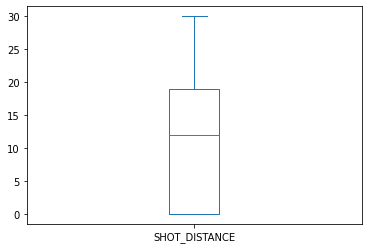

In [46]:
NormalShotsDf.plot.box(y="SHOT_DISTANCE")

<AxesSubplot:>

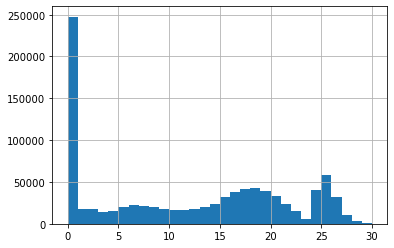

In [47]:
#Display the same data as a histogram, this will be more informative.
NormalShotsDf["SHOT_DISTANCE"].hist(bins=30)

In [48]:
#Calculate what percent of shots in this dataframe occur at 0'.
len(NormalShotsDf[NormalShotsDf["SHOT_DISTANCE"]==0].index)/len(NormalShotsDf.index)*100

26.686106364974048

<AxesSubplot:>

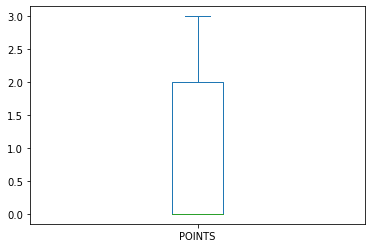

In [49]:
#This box plot isn't as informative, as all shots in the data frame are worth 0, 2, or 3 points.
NormalShotsDf.plot.box(y="POINTS")

Text(0.5, 1.0, 'Shot Type Frequency.')

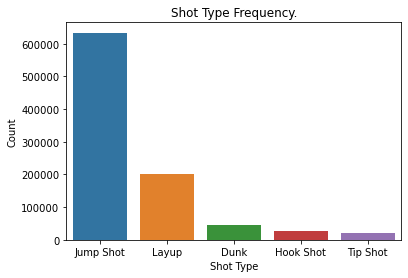

In [50]:
ShotFrequency=sns.countplot(x="SHOT_TYPE",data=NormalShotsDf, order=NormalShotsDf['SHOT_TYPE'].value_counts().index);
ShotFrequency.set_xlabel( "Shot Type")
ShotFrequency.set_ylabel( "Count")
ax = plt.gca()
ax.set_title("Shot Type Frequency.")

In [51]:
#Percents of different shot types within the data.
(NormalShotsDf.groupby("SHOT_TYPE").count().sort_values(["MAKE_OR_MISS"],ascending=False)["MAKE_OR_MISS"]/NormalShotsDf.groupby("SHOT_TYPE").count().sort_values(["MAKE_OR_MISS"],ascending=False)["MAKE_OR_MISS"].sum())*100

SHOT_TYPE
Jump Shot    68.330144
Layup        21.595097
Dunk          4.892767
Hook Shot     3.038522
Tip Shot      2.143469
Name: MAKE_OR_MISS, dtype: float64

Text(0.5, 1.0, 'Shot Distance Grouped by Shot Type.')

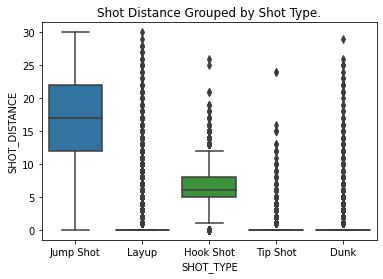

In [52]:
#Add a boxplot of shot distance grouped by shot type here. This will help inform the later scatter plots.
DistanceByType=NormalShotsDf[{'SHOT_TYPE','SHOT_DISTANCE'}]
sns.boxplot(x = DistanceByType['SHOT_TYPE'], y = DistanceByType['SHOT_DISTANCE'])
ax = plt.gca()
ax.set_title("Shot Distance Grouped by Shot Type.")

In [53]:
#The next step in answering the hypothesis is making a dataframe with an expected points column. This logic will be reused
#in the next cell. 
ExpectedPtsDf=NormalShotsDf[{'SHOT_DISTANCE','POINTS'}]
ExpectedPtsDf=ExpectedPtsDf.groupby('SHOT_DISTANCE').mean()
ExpectedPtsDf['SHOT_DISTANCE']=ExpectedPtsDf.index
#Display the dataframe without the index, as it's also called SHOT_DISTANCE and is confusing. 
print(ExpectedPtsDf.to_string(index=False))

  POINTS  SHOT_DISTANCE
1.270736              0
1.486786              1
1.194057              2
0.946424              3
0.846462              4
0.827433              5
0.824784              6
0.818557              7
0.811359              8
0.792615              9
0.781333             10
0.768816             11
0.780894             12
0.785605             13
0.795840             14
0.788978             15
0.794512             16
0.786977             17
0.780871             18
0.790663             19
0.795007             20
0.799431             21
0.843465             22
0.880202             23
1.110030             24
1.101946             25
1.001135             26
0.916566             27
0.804927             28
0.667051             29
0.535519             30


In [54]:
#Make a function to show a scatter plot, given the shot type and maximum number of feet for the shot distance. This will 
#prove useful, as many similar visualizations are required. Having a maximum shot distance for these visuals is important
#as seen in the grouped box plot above: shots further then a certain distance are an outlier for many of the shot types.
def VizbyShotType(shottype,maxdistance):
    ExpectedPtsDf=NormalShotsDf[{'SHOT_DISTANCE','POINTS'}][NormalShotsDf["SHOT_TYPE"]==shottype]
    ExpectedPtsDf=ExpectedPtsDf[ExpectedPtsDf['SHOT_DISTANCE']<=maxdistance]
    ExpectedPtsDf=ExpectedPtsDf.groupby('SHOT_DISTANCE').mean()
    ExpectedPtsDf['SHOT_DISTANCE']=ExpectedPtsDf.index
    DistanceVsPtsJumper=sns.lmplot(x='SHOT_DISTANCE', y='POINTS', data=ExpectedPtsDf, fit_reg=False);
    ax = plt.gca()
    ax.set(xlabel='Shot Distance', ylabel='Expected Points')
    ax.set_title("Shot Distance Vs. Expected Points for "+shottype+"s.")
    if maxdistance>23:
        plt.axvline(x=23.9, color='Grey', ls='--') 
        plt.text(x=24.2,y=1.4,s='Three Point Line')

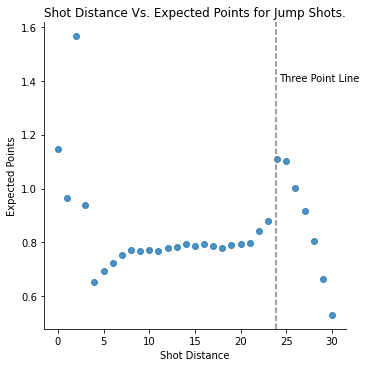

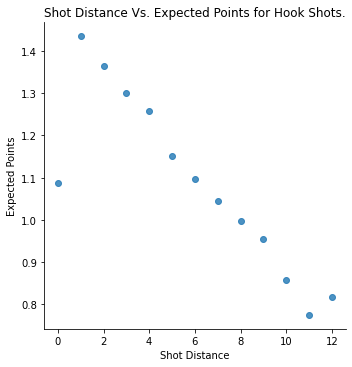

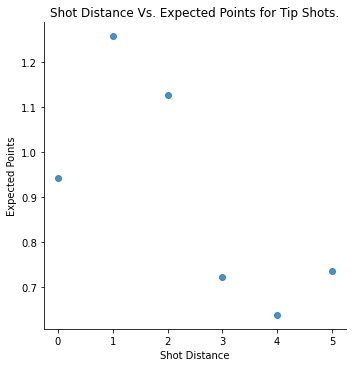

In [55]:
#The maximum shot distances for these visuals were based on the grouped box plot above. Some shots are uncommon from
#certain ranges, and the outliers in the grouped boxplot let us infer what the maximum distance should be for each scatter
#plot below. 
VizbyShotType("Jump Shot",30)
VizbyShotType("Hook Shot",12)
#Tip shots were included out of curiosity despite any shot distance greater then 0' qualifying as an outlier. This shot
#doesn't occur at 0' by definition (unlike layups and dunks), so the visual has been included below.
VizbyShotType("Tip Shot",5)

In [56]:
PtsByTypeDf=NormalShotsDf[{'SHOT_TYPE','POINTS'}]
PtsByTypeDf=PtsByTypeDf.groupby('SHOT_TYPE').mean()
PtsByTypeDf['SHOT_TYPE']=PtsByTypeDf.index
#Display the dataframe without the index, as it's also called SHOT_DISTANCE and is confusing. 
print(PtsByTypeDf.to_string(index=False))

  POINTS SHOT_TYPE
1.847052      Dunk
1.084968 Hook Shot
0.861168 Jump Shot
1.183529     Layup
0.966204  Tip Shot


Text(0.5, 1.0, 'Expected Points by Shot Type.')

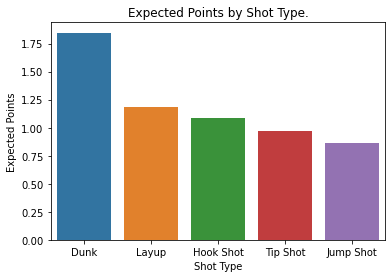

In [57]:
#Shot type versus expected points
PtsByTypeDf=PtsByTypeDf.sort_values('POINTS', ascending=False)
ShotFrequency=sns.barplot(x="SHOT_TYPE",y="POINTS",data=PtsByTypeDf);
ShotFrequency.set_xlabel( "Shot Type")
ShotFrequency.set_ylabel( "Expected Points")
ax = plt.gca()
ax.set_title("Expected Points by Shot Type.")

In [58]:
#Conclusions and results sections have been excluded, as this project's primary purpose is to show data cleaning and the 
#creation of a data pipeline. If you're interested in seeing me act on results from EDA to perform data modeling and 
#draw conclusions, please look into my "Predicting NBA Players’ 2K21 Ratings" project.